# 1. 问题背景，问题提出，问题描述。

# 问题背景
## 德州扑克，简称德扑，是当今世界上最流行的公牌扑克类游戏之一。它起源于20世纪初美国的德克萨斯州，并在随后的几十年里逐渐传播开来，尤其是在1970年WSOP（World Series of Poker，世界扑克系列赛）创办之后，它的流行程度得到了极大的提升。
## 德州扑克具有简单易懂的规则，但是要精通则需要大量的实践和策略学习。这使得它既适合新手尝试，也能为经验丰富的玩家提供持续的挑战。同时，德州扑克被认为能够提升培养决策能力、风险管理和心理素质，因而受到许多专业人士的喜爱。同时，作为一项多人博弈的游戏，德扑可以促进人与人之间的交流互动，因此在社交场合中非常受欢迎。尤其是在家庭和朋友间的聚会中，人们总是在茶余饭后选择德州扑克作为打发时间的消遣的娱乐方式。
## Poker Hand是一个包含了1025010条数据，11个特征的数据集。其中前10个特征描述了玩家在一副标准的52张扑克牌中随机抽取5张的手牌数据。每张牌使用两个属性（花色和等级）进行描述，共有10个预测属性。
## 还有一个类别属性用来描述“扑克手牌”，它的取值范围是1-10，分别对应着 different hand（不同手牌），one pair（对子），two pair（两对），three of a kind（三条），straight（顺子），flush（同花），full house（葫芦），four of a kind（四条），straight flush（同花顺），royal flush（皇家同花顺）。这直接对应着德州扑克中的不同牌型。
## 值得说明的是，Poker Hand数据集是一个没有缺失值和异常值的数据集，因此我们并不需要对原始数据集进行额外的数据清洗工作。

# 问题提出&描述
## 1. 由于从一副标准的52张扑克牌中抽取5张牌可以被经典的古典概率模型建模。因此我们想知道，在样本量超百万的情况下，利用Poker Hand数据集，验证大数定律的正确性。
## 2. 由于所给定数据集特征集与相应集合的关系明确且已知，我们想在Poker Hand数据集上应用多种多分类机器学习算法。比较不同模型之间性能的同时，结合模型的底层原理，分析不同模型的应用场景。

# 2.数据来源（数据源网址或处理后的数据集链接）。
# 数据来源：UCI Machine Learning Repository
## 该数据可以通过两种方式获取。
## 1.安装ucimlrepo包，直接通过命令行获取数据集。
## 2.直接访问官网网址下载数据。https://archive.ics.uci.edu/dataset/158/poker+hand

# 2.1 通过安装ucimlrepo直接导入数据集

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
poker_hand = fetch_ucirepo(id=158)

# data (as pandas dataframes) 
X = poker_hand.data.features
y = poker_hand.data.targets

# 2.2 将下载好的数据保存至本地读取数据

In [1]:
import pandas as pd

file_path = 'poker-hand.data'
df = pd.read_csv(file_path, header=None,
                 names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class'],
                 dtype=int)  # 确保所有列为整数

# 将 DataFrame 转换为 NumPy 数组
X = df[['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']]
y = df['class']  # 确保目标变量是1D数组

In [12]:
print(X.head())

   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5
0   1   1   1  13   2   4   2   3   1  12
1   3  12   3   2   3  11   4   5   2   5
2   1   9   4   6   1   4   3   2   3   9
3   1   4   3  13   2  13   2   1   3   6
4   3  10   2   7   1   2   2  11   4   9


In [13]:
print(y.head())

0    0
1    1
2    1
3    1
4    0
Name: class, dtype: int32


# 数据说明：
# 数据集描述

## 牌面属性

| 编号 | 属性名 | 类型及说明 |
| --- | ------ | ---------- |
| 1   | S1 "第1张牌的花色" | 序数 (1-4) 表示 {红<br/>心, 黑桃, 方块, 梅花} |
| 2   | C1 "第1张牌的点数" | 数值 (1-13) 表示 (A, 2, 3, ... , Q, K) |
| 3   | S2 "第2张牌的花色" | 序数 (1-4) 表示 {红心, 黑桃, 方块, 梅花} |
| 4   | C2 "第2张牌的点数" | 数值 (1-13) 表示 (A, 2, 3, ... , Q, K) |
| 5   | S3 "第3张牌的花色" | 序数 (1-4) 表示 {红心, 黑桃, 方块, 梅花} |
| 6   | C3 "第3张牌的点数" | 数值 (1-13) 表示 (A, 2, 3, ... , Q, K) |
| 7   | S4 "第4张牌的花色" | 序数 (1-4) 表示 {红心, 黑桃, 方块, 梅花} |
| 8   | C4 "第4张牌的点数" | 数值 (1-13) 表示 (A, 2, 3, ... , Q, K) |
| 9   | S5 "第5张牌的花色" | 序数 (1-4) 表示 {红心, 黑桃, 方块, 梅花} |
| 10  | C5 "第5张牌的点数" | 数值 (1-13) 表示 (A, 2, 3, ... , Q, K) |

## 扑克手牌分类

| 类别编号 | 描述 |
| -------- | ---- |
| 0        | 无；不是公认的扑克手牌 |
| 1        | 一对；五张牌中有一对相同点数 |
| 2        | 两对；五张牌中有两对不同点数的牌 |
| 3        | 三条；五张牌中有三张相同点数 |
| 4        | 顺子；五张连续点数的牌（不考虑花色）|
| 5        | 同花；五张相同花色的牌（不考虑点数顺序）|
| 6        | 葫芦；一手牌中同时包含一对和三条 |
| 7        | 四条；五张牌中有四张相同点数 |
| 8        | 同花顺；顺子 + 同花 |
| 9        | 皇家同花顺；{A, K, Q, J, 10} + 同花 |

### 备注

- 点数中的 A 既可以作为最小值也可以作为最大值。
- 花色编码：1 = 红心, 2 = 黑桃, 3 = 方块, 4 = 梅花。

# 3. 探索性数据分析，包括但不限于数据基本信息、数据清洗过程及数据可视化展示。

# 首先，我们可以结合古典概率模型展示数据的分布特征。
# 具体来说，我们验证在样本量超百万的条件下，各花色的样本分布、各牌型的样本分布与古典概型计算出来的概率分布的一致性。

In [14]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from plotnine import *
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['SimHei']

# 验证牌型和抽取的手牌的牌型是否一致

In [15]:
def classify_hand(row):
    # 将牌面数据转换为花色和点数的列表
    suits = row[['S1', 'S2', 'S3', 'S4', 'S5']].values  # 花色
    ranks = row[['C1', 'C2', 'C3', 'C4', 'C5']].values  # 牌面

    # 检查各种牌型
    if is_royal_flush(ranks, suits):
        return 9
    elif is_straight_flush(ranks, suits):
        return 8
    elif is_four_of_a_kind(ranks):
        return 7
    elif is_full_house(ranks):
        return 6
    elif is_flush(suits):
        return 5
    elif is_straight(ranks):
        return 4
    elif is_three_of_a_kind(ranks):
        return 3
    elif is_two_pair(ranks):
        return 2
    elif is_one_pair(ranks):
        return 1
    else:
        return 0


def is_royal_flush(ranks, suits):
    return is_straight_flush(ranks, suits) and set(ranks) == {10, 11, 12, 13, 1}


def is_straight_flush(ranks, suits):
    return is_straight(ranks) and is_flush(suits)


def is_four_of_a_kind(ranks):
    rank_counts = np.bincount(ranks)
    return 4 in rank_counts


def is_full_house(ranks):
    rank_counts = np.bincount(ranks)
    return 3 in rank_counts and 2 in rank_counts


def is_flush(suits):
    return len(set(suits)) == 1


def is_straight(ranks):
    ranks_sorted = sorted(ranks)
    return ranks_sorted == list(range(ranks_sorted[0], ranks_sorted[0] + 5)) or ranks_sorted == [1, 10, 11, 12, 13]


def is_three_of_a_kind(ranks):
    rank_counts = np.bincount(ranks)
    return 3 in rank_counts


def is_two_pair(ranks):
    rank_counts = np.bincount(ranks)
    return list(rank_counts).count(2) == 2


def is_one_pair(ranks):
    rank_counts = np.bincount(ranks)
    return 2 in rank_counts


In [16]:
predicted = X.apply(classify_hand, axis=1)

KeyboardInterrupt: 

In [10]:
y['predicted'] = predicted
if_all_correct = np.all(y['predicted'] == y)
print(f"是否所有的牌型标签y都正确：{if_all_correct}")

KeyError: 'CLASS'

In [17]:
hand = X.iloc[0, :]
suits = hand[['S1', 'S2', 'S3', 'S4', 'S5']].values
ranks = hand[['C1', 'C2', 'C3', 'C4', 'C5']].values

# print(suits)
# print(ranks)
np.bincount(ranks)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
print(classify_hand(X) == y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
# 统计各个花色在所有出现频率

# 基本信息
n_suit = 4  # 花色数量
n_card = 13  # 牌型数量
n = 52  # 总牌数
n_select = 5  # 选取牌数
n_class = 10  # 类别数量
# 映射索引为花色名称
suit_mapping = {1: '红心', 2: '黑桃', 3: '方块', 4: '梅花'}
card_mapping = {
    1: 'A',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: 'J',
    12: 'Q',
    13: 'K'
}
class_mapping = {1: ''}

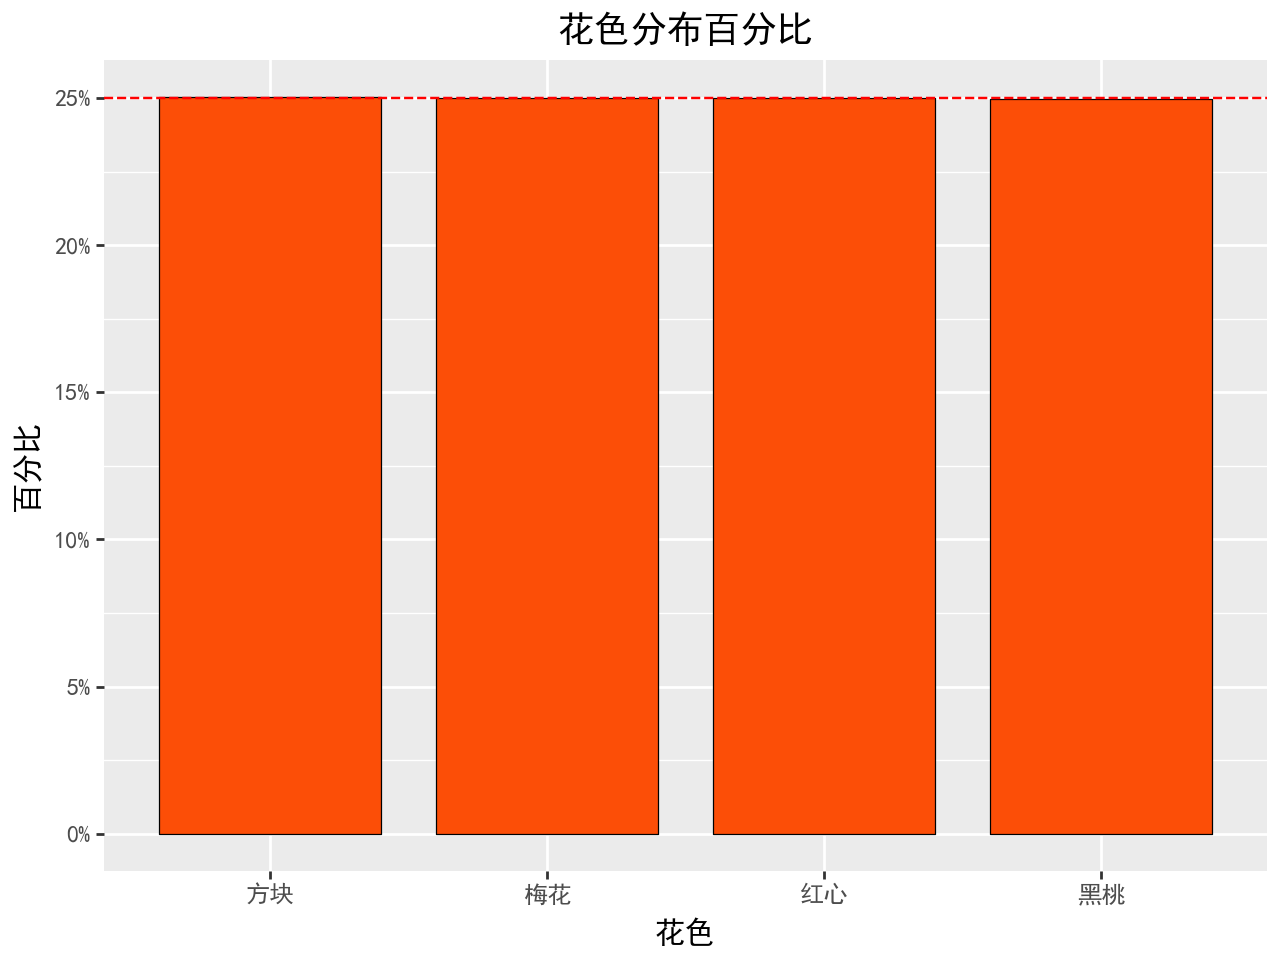

In [20]:
suits = ['S' + str(i) for i in range(1, n_select + 1)]

# 使用 sum 方法将所有 Series 相加
l = [X[suit].value_counts() for suit in suits]
combined_series = sum(l[1:], l[0])

combined_series.index = combined_series.index.map(suit_mapping)
# 计算总和
total = combined_series.sum()
# 计算百分比
percentage_series = combined_series / total * 100
# 将 Series 转换为 DataFrame
percentage_df = percentage_series.reset_index()
percentage_df.columns = ['Suit', 'Percentage']

# 绘制柱状图
p = (ggplot(percentage_df, aes(x='Suit', y='Percentage'))
     + geom_bar(stat='identity', width=0.8, color='black', size=0.25, fill='#FC4E07', alpha=1)
     + scale_y_continuous(labels=lambda breaks: [f'{x:.0f}%' for x in breaks])  # 设置y轴标签为百分比形式
     + geom_hline(yintercept=25, linetype="dashed", color="red")  # 添加一条红色虚线表示0.25（25%）
     + labs(title='花色分布百分比', x='花色', y='百分比')
     + theme(text=element_text(family="SimHei"))
     )
# 显示图形
print(p)

# 不同牌面的计算类似于牌花色的结果，这里不再赘述。
# 接下来，我们分析计算各种牌型的概率分布，并且和样本计算出的经验分布比对。
# 扑克牌各种牌型的概率计算

在一副标准的52张扑克牌中（去掉大小王），从52张牌中抽取5张的所有可能组合数为：

$ C(52, 5) = \frac{52!}{5! \cdot (52-5)!} = 2,598,960 $

接下来，我们逐一计算每种牌型的有利结果数，并计算相应的概率。

## 1. 皇家同花顺

皇家同花顺由A、K、Q、J、10五张牌组成，且必须是同一种花色。每种花色有1种皇家同花顺组合，共有4种花色。

$ P(\text{皇家同花顺}) = \frac{4}{2,598,960} \approx 0.0001539 $

## 2. 同花顺

同花顺由五张连续点数的牌组成，且必须是同一种花色。共有10种连续点数组合（A-5, 2-6, ..., 10-A），每种组合有4种花色。

$ P(\text{同花顺}) = \frac{10 \times 4}{2,598,960} = \frac{40}{2,598,960} \approx 0.001539 $

## 3. 四条

四条由四张相同点数的牌和一张任意点数的牌组成。共有13种点数，每种点数有1种四条组合，剩下的牌有48种选择。

$ P(\text{四条}) = \frac{13 \times 48}{2,598,960} = \frac{624}{2,598,960} \approx 0.002381 $

## 4. 葫芦

葫芦由三张相同点数的牌和一对相同点数的牌组成。共有13种点数选择三张相同点数的牌，剩下的牌中有12种点数选择一对相同点数的牌，每种点数有6种组合。

$ P(\text{葫芦}) = \frac{13 \times 12 \times 6}{2,598,960} = \frac{936}{2,598,960} \approx 0.00036 $

## 5. 同花

同花由五张相同花色的牌组成。共有13种点数选择，每种点数有4种花色选择，共有5种牌。

$ P(\text{同花}) = \frac{13 \times 4 \times 4 \times 3 \times 2 \times 1}{2,598,960} = \frac{5148}{2,598,960} \approx 0.001965 $

## 6. 顺子

顺子由五张连续点数的牌组成，不考虑花色。共有10种连续点数组合。

$ P(\text{顺子}) = \frac{10 \times 4^5}{2,598,960} = \frac{10 \times 1024}{2,598,960} = \frac{10240}{2,598,960} \approx 0.003925 $

## 7. 三条

三条由三张相同点数的牌和两张不同点数的牌组成。共有13种点数选择三张相同点数的牌，剩下的牌中有12种点数选择两张不同点数的牌，每种点数有6种组合。

$ P(\text{三条}) = \frac{13 \times 12 \times 11 \times 6}{2,598,960} = \frac{54912}{2,598,960} \approx 0.021128 $

## 8. 两对

两对由两对相同点数的牌和一张不同点数的牌组成。共有13种点数选择两对相同点数的牌，剩下的牌中有11种点数选择一张不同点数的牌，每种点数有6种组合。

$ P(\text{两对}) = \frac{13 \times 12 \times 6 \times 44}{2,598,960} = \frac{123552}{2,598,960} \approx 0.047539 $

## 9. 一对

一对由一对相同点数的牌和三张不同点数的牌组成。共有13种点数选择一对相同点数的牌，剩下的牌中有12种点数选择三张不同点数的牌，每种点数有6种组合。

$ P(\text{一对}) = \frac{13 \times 12 \times 11 \times 10 \times 4 \times 3 \times 2 \times 1}{2,598,960} = \frac{1098240}{2,598,960} \approx 0.422569 $

## 10. 高牌

高牌由五张不同点数的牌组成，不考虑花色。共有13种点数选择五张不同点数的牌，每种点数有4种花色选择。

$ P(\text{高牌}) = \frac{13 \times 12 \times 11 \times 10 \times 9 \times 4^5}{2,598,960} = \frac{1302540}{2,598,960} \approx 0.507042 $

总结：

- 皇家同花顺: 0.0001539
- 同花顺: 0.001539
- 四条: 0.002381
- 葫芦: 0.00036
- 同花: 0.001965
- 顺子: 0.003925
- 三条: 0.021128
- 两对: 0.047539
- 一对: 0.422569
- 高牌: 0.507042

# 接下来我们根据从样本中计算出经验分布，并且与精确的概率进行对比。

In [24]:
# 假设 `y` 是一个包含 'CLASS' 列的 DataFrame
# 计算 'CLASS' 列的值计数
c = y.value_counts()

# 计算概率
c = c / sum(c)

# 定义扑克手牌分类
poker_hand_categories = {
    0: "无",
    1: "一对",
    2: "两对",
    3: "三条",
    4: "顺子",
    5: "同花",
    6: "葫芦",
    7: "四条",
    8: "同花顺",
    9: "皇家同花顺"
}
c.index = c.index.map(poker_hand_categories)
c.name = '频率'
df = pd.DataFrame(c)
print(df)

             频率
class          
无      0.501168
一对     0.422530
两对     0.047637
三条     0.021106
顺子     0.003881
同花     0.002000
葫芦     0.001424
四条     0.000230
同花顺    0.000017
皇家同花顺  0.000008


In [25]:
import math

# 总的可能组合数
total_combinations = math.comb(52, 5)


# 各种牌型的概率计算
def royal_flush_probability():
    # 皇家同花顺：每种花色有1种组合，共有4种花色
    return 4 / total_combinations


def straight_flush_probability():
    # 同花顺：每种花色有10种连续点数组合，共有4种花色
    return 9 * 4 / total_combinations


def four_of_a_kind_probability():
    # 四条：13种点数选择，每种点数有48种选择
    return 13 * 48 / total_combinations


def full_house_probability():
    # 葫芦：13种点数选择三张相同点数的牌，剩下的牌中有12种点数选择一对相同点数的牌
    return 13 * 12 * math.comb(4, 3) * math.comb(4, 2) / total_combinations


def flush_probability():
    # 同花：每种花色有13种点数选择，共有5种牌
    return (math.comb(13, 5) * 4 - 40) / total_combinations


def straight_probability():
    # 顺子：10种连续点数组合
    return (10 * math.pow(4, 5) - 40) / total_combinations


def three_of_a_kind_probability():
    # 三条：13种点数选择三张相同点数的牌，剩下的牌中有12种点数选择两张不同点数的牌
    return 13 * math.comb(12, 2) * 4 ** 3 / total_combinations


def two_pair_probability():
    # 两对：13种点数选择两对相同点数的牌，剩下的牌中有11种点数选择一张不同点数的牌
    return math.comb(13, 2) * math.comb(4, 2) ** 2 * 44 / total_combinations


def one_pair_probability():
    # 一对：13种点数选择一对相同点数的牌，剩下的牌中有12种点数选择三张不同点数的牌
    return 13 * math.comb(12, 3) * math.comb(4, 2) * 4 ** 3 / total_combinations


# 计算各种牌型的概率
royal_flush_prob = royal_flush_probability()
straight_flush_prob = straight_flush_probability()
four_of_a_kind_prob = four_of_a_kind_probability()
full_house_prob = full_house_probability()
flush_prob = flush_probability()
straight_prob = straight_probability()
three_of_a_kind_prob = three_of_a_kind_probability()
two_pair_prob = two_pair_probability()
one_pair_prob = one_pair_probability()
l = [royal_flush_prob, straight_flush_prob, four_of_a_kind_prob, full_house_prob, flush_prob, straight_prob,
     three_of_a_kind_prob, two_pair_prob, one_pair_prob]
high_card_prob = 1 - sum(l)
l.append(high_card_prob)
l = l[::-1]
df['概率'] = l
# 输出结果
print(f"皇家同花顺概率: {royal_flush_prob:.8f}")
print(f"同花顺概率: {straight_flush_prob:.8f}")
print(f"四条概率: {four_of_a_kind_prob:.8f}")
print(f"葫芦概率: {full_house_prob:.8f}")
print(f"同花概率: {flush_prob:.8f}")
print(f"顺子概率: {straight_prob:.8f}")
print(f"三条概率: {three_of_a_kind_prob:.8f}")
print(f"两对概率: {two_pair_prob:.8f}")
print(f"一对概率: {one_pair_prob:.8f}")
print(f"高牌概率: {high_card_prob:.8f}")

皇家同花顺概率: 0.00000154
同花顺概率: 0.00001385
四条概率: 0.00024010
葫芦概率: 0.00144058
同花概率: 0.00196540
顺子概率: 0.00392465
三条概率: 0.02112845
两对概率: 0.04753902
一对概率: 0.42256903
高牌概率: 0.50117739


In [30]:
df.to_excel('poker_hand_probabilities.xlsx')

# 4. 结合但不限于本门课程所学习的知识进行分析（比如利用scikit-learn），
## 并在报告中展现出用到了类的定义、解决异常和调用函数等。注意代码的简洁性和模块化。

# 4.1 XGboost数据建模

In [2]:
import xgboost as xgb
import tempfile
import shutil
import atexit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings("ignore")


class PokerHandXGBClassifier:
    def __init__(self, test_size=0.2, random_state=1234):
        self.test_size = test_size
        self.random_state = random_state
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.best_model = None
        self.temp_dir = tempfile.mkdtemp()
        atexit.register(self.cleanup_temp_dir)

    def load_data(self):
        # 读取数据文件
        with open('poker-hand.data', 'r') as file:
            lines = file.readlines()
        df = pd.DataFrame([line.strip().split(',') for line in lines],
                          columns=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class'])
        df = df.astype(int)

        # 将 DataFrame 转换为 NumPy 数组
        X_array = df[['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']].values
        y_array = df['class'].values.ravel()  # 确保目标变量是1D数组

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_array, y_array, test_size=self.test_size, random_state=self.random_state
        )
        print('数据已经导入')

    def train_model(self):
        # 定义参数网格
        param_grid = {
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [100, 200],
            'colsample_bytree': [0.6, 0.8],
            'subsample': [0.6, 0.8]
        }

        # 初始化 XGBoost 分类器
        model = xgb.XGBClassifier(eval_metric='mlogloss', n_jobs=16)  # 确保XGBoost本身也并行化

        # 使用 GridSearchCV 执行交叉验证并搜索最优参数
        # cv = 5默认是使用分层抽样
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=5,
            scoring='accuracy',
            verbose=1,
            n_jobs=16  # 使用所有可用的处理器核心
        )

        try:
            # 忽略所有警告（谨慎使用，最好只忽略特定类型的警告）
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                grid_search.fit(self.X_train, self.y_train)

            # 输出最佳参数和得分
            print("Best parameters found: ", grid_search.best_params_)
            print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

            # 使用最优参数保存模型
            self.best_model = grid_search.best_estimator_

            # 保存最优模型
            model_filename = 'model/best_xgb_model.joblib'
            joblib.dump(self.best_model, model_filename)
            print(f"Optimal model saved to {model_filename}")

        except Exception as e:
            print(f"An error occurred during the GridSearchCV process: {e}")

    def evaluate_model(self):
        if self.best_model is None:
            print("Model has not been trained yet.")
            return

        # 使用最优参数预测测试集
        preds = self.best_model.predict(self.X_test)

        # 计算准确率
        accuracy = accuracy_score(self.y_test, preds)
        print("Test set accuracy with best parameters: {:.2f}".format(accuracy))

        # 绘制混淆矩阵
        self.plot_confusion_matrix(preds)

        # 绘制特征重要性
        self.plot_feature_importance()

        # 打印分类报告
        print(classification_report(self.y_test, preds))

    def plot_confusion_matrix(self, preds):
        cm = confusion_matrix(self.y_test, preds)
        plt.figure(figsize=(12, 12), dpi=300)
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(self.y_test),
                    yticklabels=np.unique(self.y_test))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.savefig('pic/xgb/confusion_matrix.png')
        plt.show()

    def plot_feature_importance(self):
        feature_importances = self.best_model.feature_importances_
        features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']
        indices = np.argsort(feature_importances)[::-1]

        plt.figure(figsize=(12, 10), dpi=300)
        plt.title("Feature Importances")
        plt.bar(range(len(features)), feature_importances[indices], align="center")
        plt.xticks(range(len(features)), [features[i] for i in indices])
        plt.xlim([-1, len(features)])
        plt.savefig('pic/xgb/feature_importance.png')
        plt.show()

    def cleanup_temp_dir(self):
        shutil.rmtree(self.temp_dir, ignore_errors=True)


In [3]:
# 使用类
xgb_classifier = PokerHandXGBClassifier()
xgb_classifier.load_data()
xgb_classifier.train_model()
xgb_classifier.evaluate_model()

# Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
# Best cross-validation score: 0.77
# Test set accuracy with best parameters: 0.77

数据已经导入
Fitting 5 folds for each of 1 candidates, totalling 5 fits
An error occurred during the GridSearchCV process: Singleton array array(None, dtype=object) cannot be considered a valid collection.
Model has not been trained yet.


# 加载训练好的XGBoost模型

Model loaded from model/best_xgb_model.joblib
数据已经导入
Test set accuracy with best parameters: 0.77


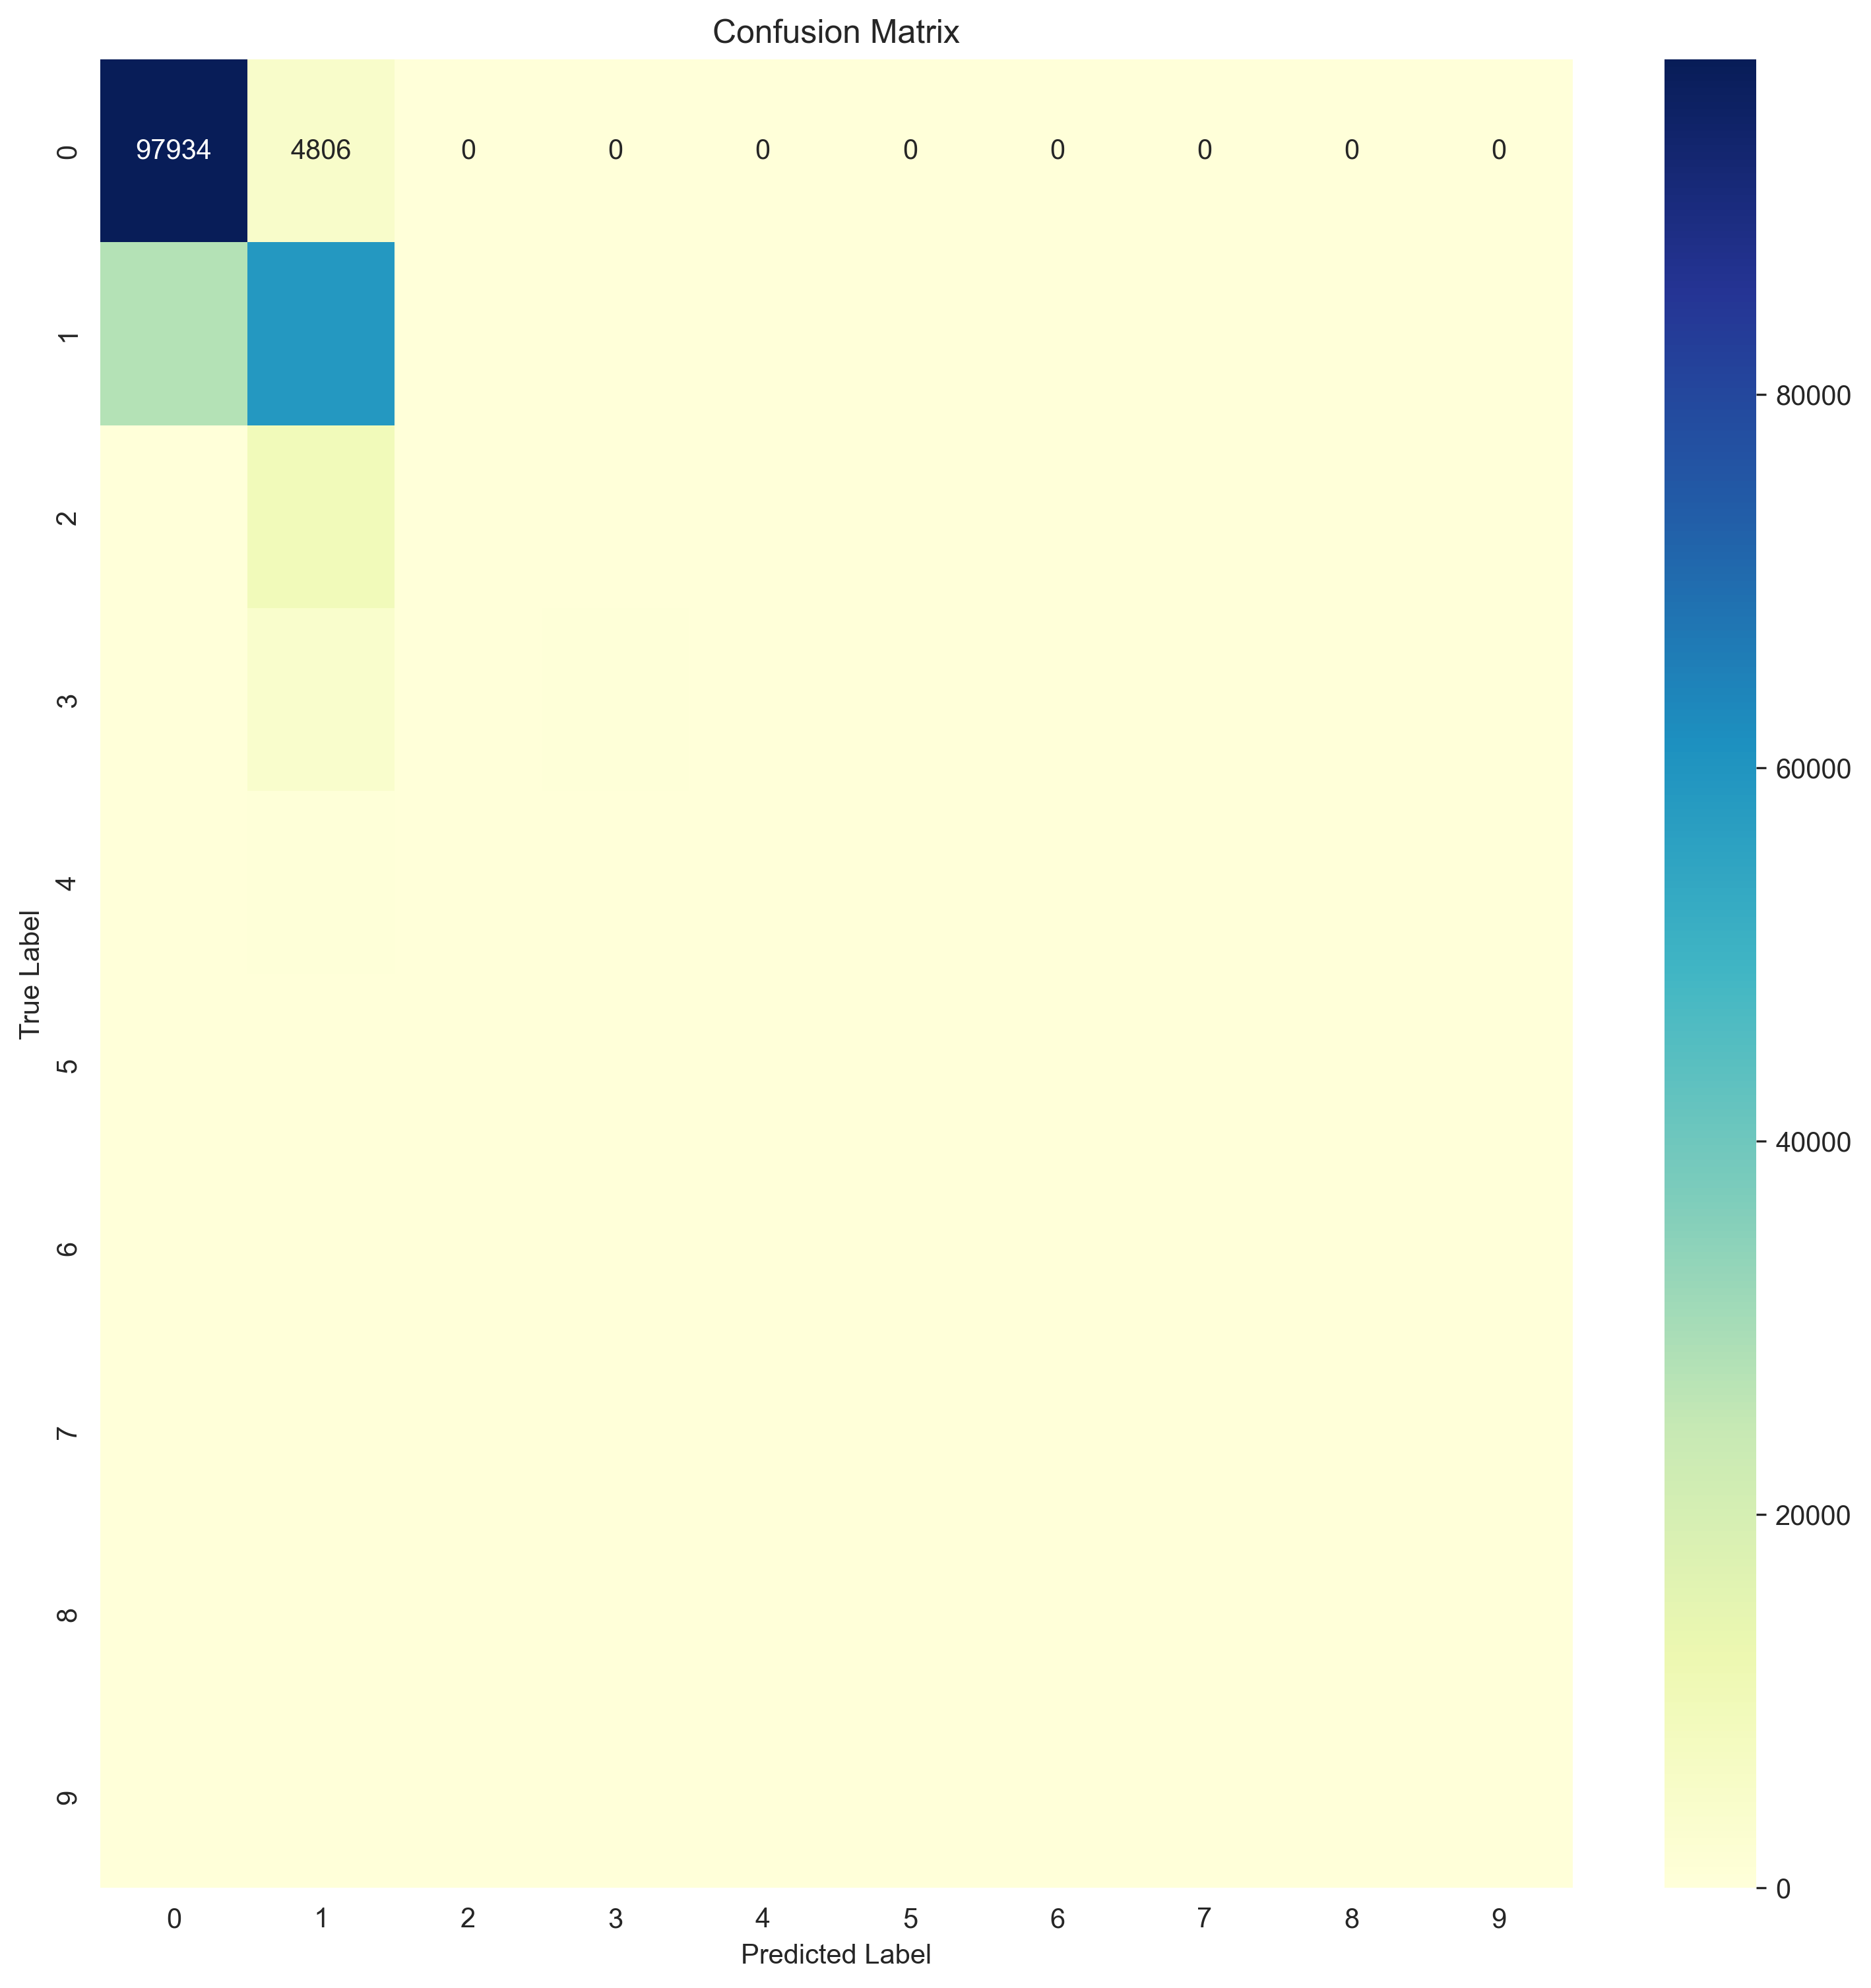

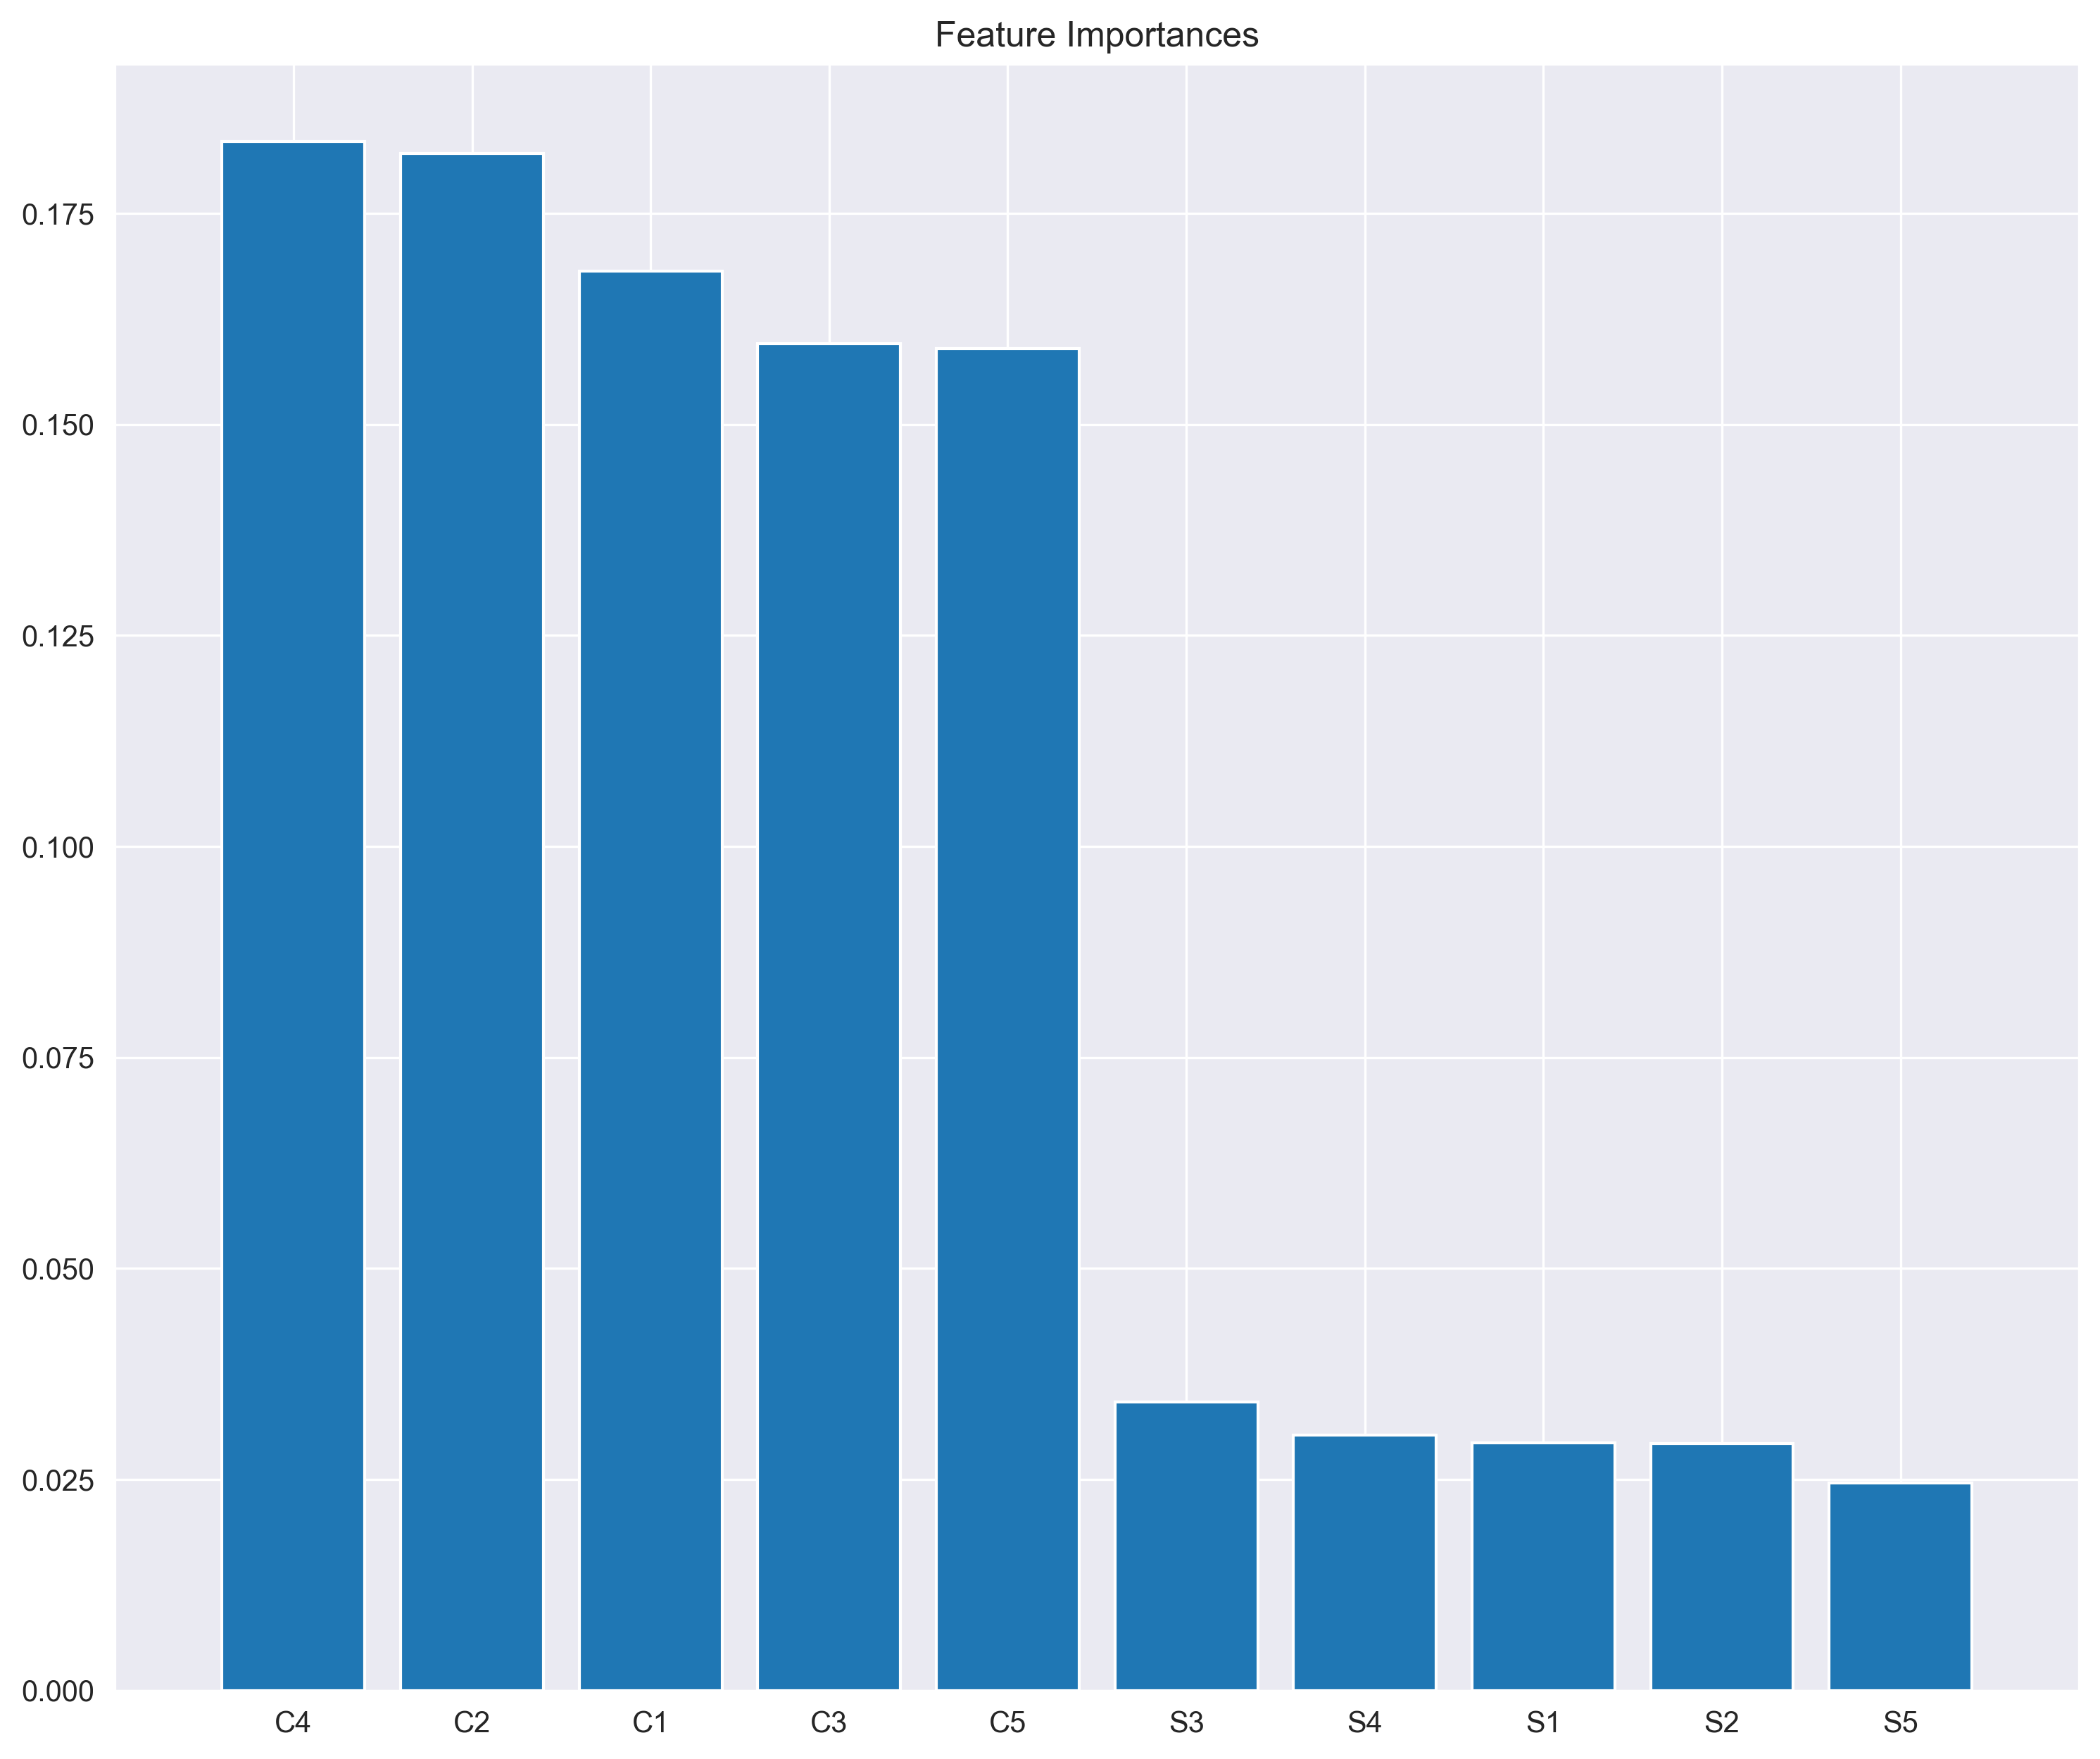

              precision    recall  f1-score   support

           0       0.78      0.95      0.86    102740
           1       0.75      0.68      0.71     86619
           2       0.50      0.00      0.00      9766
           3       0.85      0.10      0.18      4327
           4       0.00      0.00      0.00       796
           5       1.00      0.51      0.67       410
           6       0.00      0.00      0.00       292
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.77    205002
   macro avg       0.39      0.22      0.24    205002
weighted avg       0.75      0.77      0.74    205002


In [19]:
import joblib

# 加载训练好的模型
model_filename = 'model/best_xgb_model.joblib'
loaded_model = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")
xgb_classifier = PokerHandXGBClassifier()
xgb_classifier.load_data()

# 设置加载的模型为最佳模型
xgb_classifier.best_model = loaded_model

# 评估加载的模型
xgb_classifier.evaluate_model()

# 4.2 Neural Network数据建模

In [7]:
import torch
import torch.nn as nn
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import skorch

warnings.filterwarnings("ignore")


class PokerHandMLPClassifier:
    def __init__(self, test_size=0.2, random_state=1234):
        self.test_predictions = None
        self.test_size = test_size
        self.random_state = random_state
        self.best_model = None
        self.scaler = StandardScaler()
        self.loss_history = {}  # 存储最优模型的损失历史

    def load_data(self, file_path='poker-hand.data'):
        # 加载数据
        df = pd.read_csv(file_path, header=None,
                         names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class'],
                         dtype=int)  # 确保所有列为整数

        # 将 DataFrame 转换为 NumPy 数组
        X_array = df[['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']].values
        y_array = df['class'].values.ravel()  # 确保目标变量是1D数组

        # 划分训练集和测试集
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_array, y_array, test_size=self.test_size, random_state=self.random_state
        )
        print('数据已经导入')

    def preprocess_data(self):
        # 数据预处理
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        # 将数据转换为 PyTorch 张量
        self.X_train_tensor = torch.tensor(self.X_train_scaled, dtype=torch.float32)
        self.y_train_tensor = torch.tensor(self.y_train, dtype=torch.long)
        self.X_test_tensor = torch.tensor(self.X_test_scaled, dtype=torch.float32)
        self.y_test_tensor = torch.tensor(self.y_test, dtype=torch.long)

        # 创建数据加载器
        self.train_dataset = TensorDataset(self.X_train_tensor, self.y_train_tensor)
        self.test_dataset = TensorDataset(self.X_test_tensor, self.y_test_tensor)
        self.train_loader = DataLoader(dataset=self.train_dataset, batch_size=64, shuffle=True)
        self.test_loader = DataLoader(dataset=self.test_dataset, batch_size=64, shuffle=False)

    def define_model(self, input_dim, hidden_dim, output_dim):
        class MLP(nn.Module):
            def __init__(self, input_dim, hidden_dim, output_dim):
                super(MLP, self).__init__()
                self.layers = nn.Sequential(
                    nn.Linear(input_dim, hidden_dim),
                    nn.ReLU(),
                    nn.Linear(hidden_dim, hidden_dim),
                    nn.ReLU(),
                    nn.Linear(hidden_dim, output_dim)
                )

            def forward(self, x):
                return self.layers(x)

        return MLP(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

    def train_model(self):
        input_dim = self.X_train_tensor.shape[1]
        output_dim = len(set(self.y_train))  # 类别数

        # 使用 skorch 包装 PyTorch 模型
        net = NeuralNetClassifier(
            self.define_model,
            module__input_dim=input_dim,
            module__hidden_dim=50,  # 可根据需要调整隐藏层大小
            module__output_dim=output_dim,
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.Adam,
            lr=0.001,
            max_epochs=30,
            batch_size=64,
            iterator_train__shuffle=True,
            device='cuda' if torch.cuda.is_available() else 'cpu',
        )

        # 定义参数网格
        # Best parameters found:  {'batch_size': 16, 'lr': 0.001, 'max_epochs': 30, 'module__hidden_dim': 30}
        # Best cross-validation score: 1.00
        # Optimal model saved to model/best_mlp_model.pth
        # Test set accuracy with best parameters: 99.76%
        param_grid = {
            'lr': [0.01, 0.001],
            'module__hidden_dim': [20, 30],
            'max_epochs': [20, 30],
            'batch_size': [16, 32, 64, 128]
        }
        # 使用 GridSearchCV 进行超参数搜索
        grid_search = GridSearchCV(net, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=16)  

        # 确保输入是 NumPy 数组而非张量，因为 GridSearchCV 预期的是 NumPy 数组
        X_train_np = self.X_train_tensor.numpy()
        y_train_np = self.y_train_tensor.numpy()

        # 训练模型
        grid_search.fit(X_train_np, y_train_np)

        # 输出最佳参数和得分
        print("Best parameters found: ", grid_search.best_params_)
        print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

        # 使用最优参数获取最佳模型
        self.best_model = grid_search.best_estimator_
        history = self.best_model.history
        train_loss = [epoch['train_loss'] for epoch in history]
        valid_loss = [epoch['valid_loss'] for epoch in history]
        self.loss_history = {'train_loss': train_loss, 'valid_loss': valid_loss}

        # 获取最佳模型的状态字典并保存
        model_filename = 'model/best_mlp_model.pth'
        torch.save(self.best_model.module_.state_dict(), model_filename)
        print(f"Optimal model saved to {model_filename}")
        self.plot_loss_curve()

    def evaluate_model(self):
        if self.best_model is None:
            print("Model has not been trained yet.")
            return

        correct = 0
        total = 0
        predictions = []
        true_labels = []

        with torch.no_grad():
            for inputs, labels in self.test_loader:
                outputs = self.best_model.predict(inputs.numpy())
                predictions.extend(outputs.tolist())
                true_labels.extend(labels.numpy().tolist())
                correct += (outputs == labels.numpy()).sum().item()
                total += labels.size(0)

        print(f'Test set accuracy with best parameters: {100 * correct / total:.2f}%')

        self.test_predictions = predictions

        # 绘制混淆矩阵
        self.plot_confusion_matrix(true_labels, predictions)

    def plot_confusion_matrix(self, true_labels, preds):
        cm = confusion_matrix(true_labels, preds)
        plt.figure(figsize=(12, 12))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels),
                    yticklabels=np.unique(true_labels))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.savefig('pic/mlp/confusion_matrix.png')
        plt.show()

    def plot_loss_curve(self):
        train_loss = self.loss_history['train_loss']
        valid_loss = self.loss_history['valid_loss']
        epochs = range(1, len(train_loss) + 1)
        plt.figure(figsize=(12, 10))
        plt.plot(epochs, train_loss, label='Training Loss')
        plt.plot(epochs, valid_loss, label='Training Loss')
        plt.title('Loss Function Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('pic/mlp/loss_curve.png')
        plt.show()


数据已经导入
Fitting 5 folds for each of 32 candidates, totalling 160 fits
  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        0.8857       0.6717        0.7640  70.8110
      2        0.6560       0.7937        0.5398  65.7947
      3        0.4721       0.8447        0.3994  65.9889
      4        0.3265       0.9190        0.2388  68.9349
      5        0.1696       0.9723        0.1191  70.7969
      6        0.0985       0.9809        0.0740  62.5771
      7        0.0549       0.9935        0.0350  73.5394
      8        0.0343       0.9952        0.0253  61.1415
      9        0.0243       0.9980        0.0155  61.5481
     10        0.0187       0.9985        0.0113  73.1660
     11        0.0161       0.9975        0.0137  73.1770
     12        0.0144       0.9991        0.0082  67.0419
     13        0.0135       0.9975        0.0124  70.9872
     14        0.0128       0.9986        0.0084  66.4976
   

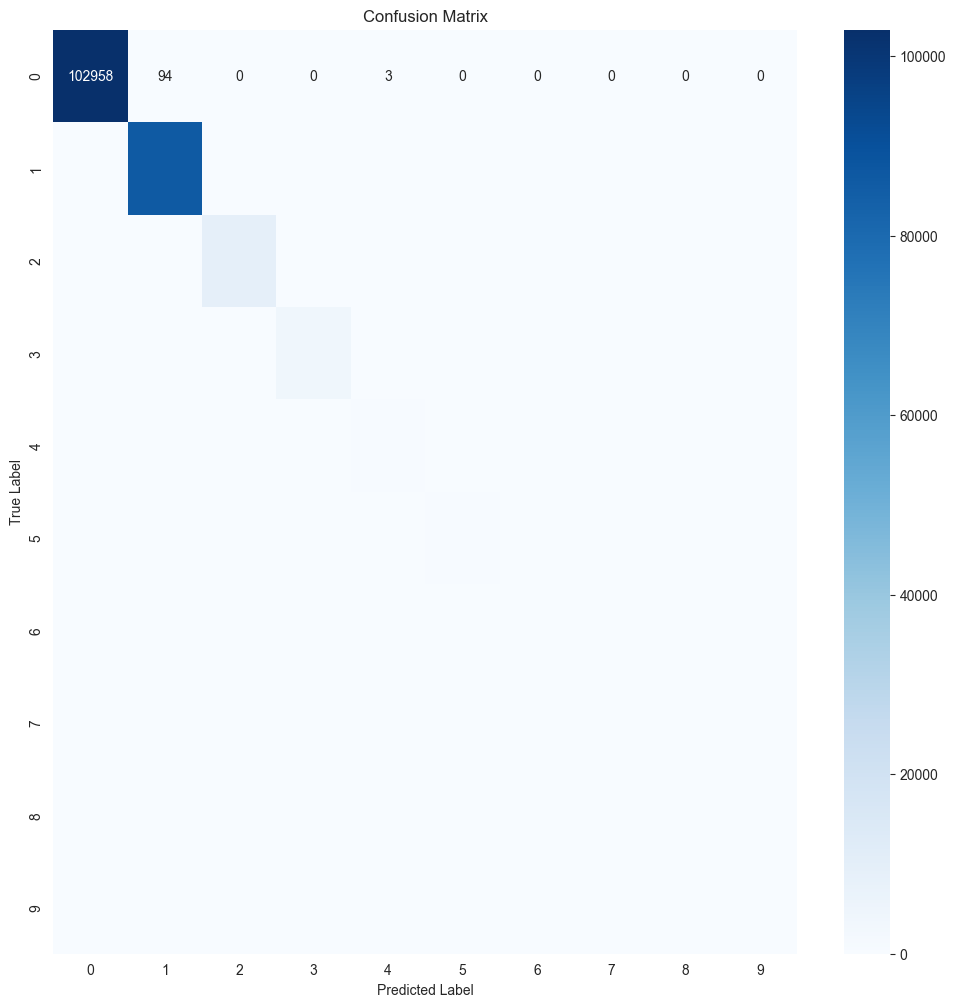

In [5]:
# 使用类
mlp_classifier = PokerHandMLPClassifier()
mlp_classifier.load_data()
mlp_classifier.preprocess_data()
mlp_classifier.train_model()
mlp_classifier.evaluate_model()

# Best parameters found:  {'batch_size': 16, 'lr': 0.001, 'max_epochs': 20, 'module__hidden_dim': 30}
# Best cross-validation score: 0.99

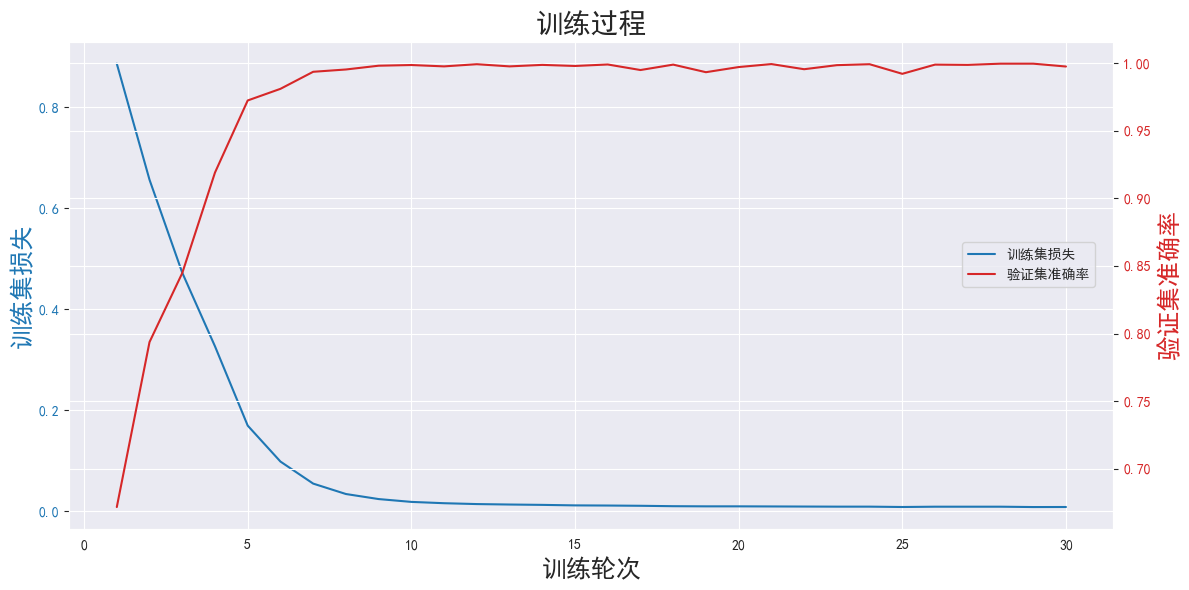

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('res.xlsx')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 获取数据
train_loss = df['train_loss']
valid_acc = df['valid_acc']
epochs = range(1, len(train_loss) + 1)

# 创建图形对象和主轴（左轴）
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制训练集损失曲线
color = 'tab:blue'
ax1.set_xlabel('训练轮次', fontsize=18)
ax1.set_ylabel('训练集损失', color=color, fontsize=18)
ax1.plot(epochs, train_loss, color=color, label='训练集损失')
ax1.tick_params(axis='y', labelcolor=color)

# 创建次轴（右轴）用于绘制验证集准确率
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('验证集准确率', color=color, fontsize=18)  
ax2.plot(epochs, valid_acc, color=color, label='验证集准确率')
ax2.tick_params(axis='y', labelcolor=color)

# 设置标题
plt.title('训练过程', fontsize=20)

# 添加图例
fig.legend(loc="upper left", bbox_to_anchor=(0.8,0.6))

# 保存图像并显示
plt.tight_layout()
plt.savefig('pic/mlp/loss_curve.png')
plt.show()

# 加载训练好的MLP模型

数据已经导入
Test set accuracy with best parameters: 99.76%


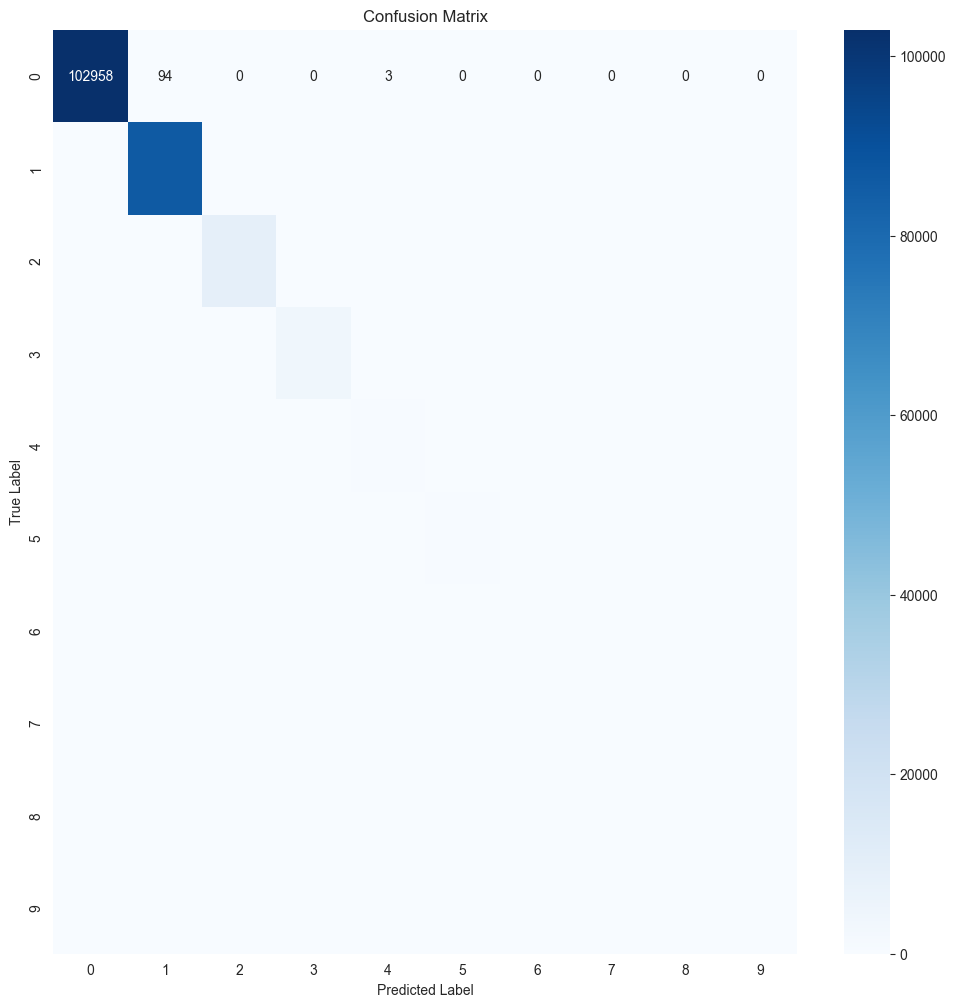

In [8]:
# 加载并评估模型
def load_and_evaluate_model(opt_hyp_params):
    # 初始化分类器
    mlp_classifier = PokerHandMLPClassifier()
    mlp_classifier.load_data()
    mlp_classifier.preprocess_data()

    # 重新定义模型架构
    input_dim = mlp_classifier.X_train_tensor.shape[1]
    output_dim = len(set(mlp_classifier.y_train))
    model_architecture = mlp_classifier.define_model(input_dim, hidden_dim=opt_hyp_params['hidden_dim'],
                                                     output_dim=output_dim)

    # 加载保存的状态字典
    model_filename = 'model/best_mlp_model.pth'
    loaded_state_dict = torch.load(model_filename)
    model_architecture.load_state_dict(loaded_state_dict)

    # 使用 skorch 包装加载好的模型
    wrapped_model = NeuralNetClassifier(
        lambda: model_architecture,
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.Adam,
        lr=opt_hyp_params['lr'],
        max_epochs=0,  # 设置为0以避免进一步训练
        batch_size=opt_hyp_params['batch_size'],
        iterator_train__shuffle=True,
        device='cuda' if torch.cuda.is_available() else 'cpu'
    )

    # 初始化模型
    wrapped_model.initialize()

    # 设置加载的模型为最佳模型
    mlp_classifier.best_model = wrapped_model
    return mlp_classifier
    # 评估加载的模型


opt_hyp_params = {'batch_size': 16, 'lr': 0.01, 'max_epochs': 10, 'hidden_dim': 30}
# 执行加载和评估
mlp_classifier = load_and_evaluate_model(opt_hyp_params)
mlp_classifier.evaluate_model()

In [15]:
from sklearn.metrics import classification_report

# 假设 mlp_evaluation 是你的DataFrame
# 你可以直接从DataFrame中获取预测值和真实值
mlp_evaluation = pd.DataFrame({'predictions': mlp_classifier.test_predictions, 'true_labels': mlp_classifier.y_test})
y_true = mlp_evaluation['true_labels']
y_pred = mlp_evaluation['predictions']

# 生成分类报告
report = classification_report(y_true, y_pred)

# 打印报告
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103055
           1       1.00      1.00      1.00     86287
           2       1.00      0.97      0.99      9745
           3       0.99      1.00      1.00      4339
           4       0.99      0.90      0.95       820
           5       0.99      1.00      0.99       410
           6       0.98      0.97      0.98       287
           7       1.00      0.89      0.94        53
           8       1.00      0.40      0.57         5
           9       0.00      0.00      0.00         1

    accuracy                           1.00    205002
   macro avg       0.89      0.81      0.84    205002
weighted avg       1.00      1.00      1.00    205002
